<a href="https://colab.research.google.com/github/Vip247-cloud/git1strepo/blob/main/MyFinal_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import statistics
import time
import random
import os

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics


from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold



In [ ]:
import os
# data = pd.read_csv("/IoT Network Intrusion Dataset.csv")
# file_path = "/content/drive/MyDrive/IoTID20/IoT Network Intrusion Dataset.csv"
file_path = "/content/drive/MyDrive/IoT Network Intrusion Dataset.csv" # Please update this path
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("File loaded successfully.")
    display(data.head())
else:
    print(f"Error: The file was not found at {file_path}. Please check the file path and try again.")

File loaded successfully.


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data1 = data.copy()
data_labels1 = Counter(data1['Cat'])
print(data_labels1)

Counter({'Mirai': 415677, 'Scan': 75265, 'DoS': 59391, 'Normal': 40073, 'MITM ARP Spoofing': 35377})


In [ ]:
data1_wn = data1[(data1['Cat'] == 'Scan') | (data1['Cat'] == 'DoS') | (data1['Cat'] == 'Normal') | (data1['Cat'] == 'MITM ARP Spoofing')]
data_labels_wn = Counter(data1_wn['Cat'])
print(data_labels_wn)

data1_d = data1[(data1['Cat'] == 'Mirai')]
data_labels_d = Counter(data1_d['Cat'])
print(data_labels_d)

data1_du = data1_d.sample(frac = 0.2)
data_labels_du = Counter(data1_du['Cat'])
print(data_labels_du)

# data1_n = data1[(data1[' Label'] == 'Normal')]
# data_labels_n = Counter(data1_n[' Label'])
# print(data_labels_n)

# data1_nu = data1_n.sample(frac = 0.08)
# data_labels_nu = Counter(data1_nu[' Label'])
# print(data_labels_nu)

Counter({'Scan': 75265, 'DoS': 59391, 'Normal': 40073, 'MITM ARP Spoofing': 35377})
Counter({'Mirai': 415677})
Counter({'Mirai': 83135})


In [ ]:
data1_us = pd.concat([data1_wn, data1_du])

In [ ]:
data1_us

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.000000,0.0,0.0,2655.000000,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.000000,0.0,0.0,70.500000,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.000000,0.0,0.0,112.000000,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.000000,0.0,0.0,6799.000000,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding
15,192.168.0.13-192.168.0.23-9020-44144-6,192.168.0.13,9020,192.168.0.23,44144,6,26/05/2019 10:06:28 PM,60431,5,7,...,326.401593,898.0,121.0,9708.333333,16525.220152,43394.0,1394.0,Anomaly,DoS,DoS-Synflooding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:24:10 AM,272,1,1,...,0.000000,0.0,0.0,272.000000,0.000000,272.0,272.0,Anomaly,Mirai,Mirai-UDP Flooding
197819,192.168.0.24-58.229.187.11-49280-443-6,192.168.0.24,49280,58.229.187.11,443,6,10/09/2019 01:48:48 AM,115,0,2,...,0.000000,0.0,0.0,115.000000,0.000000,115.0,115.0,Anomaly,Mirai,Mirai-Hostbruteforceg
225951,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:22:50 AM,245,2,1,...,0.000000,0.0,0.0,122.500000,44.547727,154.0,91.0,Anomaly,Mirai,Mirai-Ackflooding
456349,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:24:35 AM,193,1,1,...,0.000000,0.0,0.0,193.000000,0.000000,193.0,193.0,Anomaly,Mirai,Mirai-HTTP Flooding


In [ ]:
# tf.keras.backend.clear_session()

In [ ]:
print(data1_us.shape)
data1_us.columns

(293241, 86)


Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [ ]:
data_os = data1_us.copy()

In [ ]:
# Correct duplicate column names in the DataFrame
cols = data_os.columns.tolist()

# Find indices of problematic columns
# duplicate_indices = [i for i, col in enumerate(cols) if col == 'Flow Packets/s']
duplicate_indices = [i for i, col in enumerate(cols) if col == 'Flow_Pkts/s']
# Rename the first occurrence to 'Flow Byts/s' and the second to 'Flow Pkts/s'
if len(duplicate_indices) >= 2:
    cols[duplicate_indices[0]] = 'Flow_Byts/s'
    cols[duplicate_indices[1]] = 'Flow_Pkts/s'
    data_os.columns = cols  # Update DataFrame columns

# Now run the original checks
print("Flow Byts/s contains missing values: ", data_os['Flow_Byts/s'].isnull().values.any())
print("Flow Byts/s total missing values: ", data_os['Flow_Byts/s'].isnull().sum())
print("Flow Byts/s total infinite values: ", data_os['Flow_Byts/s'].isin([np.inf, -np.inf]).sum())

print("     ")

print("Flow Pkts/s contains missing values: ", data_os['Flow_Pkts/s'].isnull().values.any())
print("Flow Pkts/s total missing values: ", data_os['Flow_Pkts/s'].isnull().sum())
print("Flow Pkts/s total infinite values: ", data_os['Flow_Pkts/s'].isin([np.inf, -np.inf]).sum())

Flow Byts/s contains missing values:  False
Flow Byts/s total missing values:  0
Flow Byts/s total infinite values:  95
     
Flow Pkts/s contains missing values:  False
Flow Pkts/s total missing values:  0
Flow Pkts/s total infinite values:  95


In [ ]:
MaxValues_B = data_os['Flow_Byts/s'].max()
print(MaxValues_B)
MaxValues_P = data_os['Flow_Pkts/s'].max()
print(MaxValues_P)

max_b = data_os.loc[data_os['Flow_Byts/s'] != np.inf, 'Flow_Byts/s'].max()
data_os['Flow_Byts/s'].replace(np.inf,max_b,inplace=True)

data_os['Flow_Byts/s'].fillna(data_os['Flow_Byts/s'].mean(), inplace=True)

data_os['Flow KBytes/s'] = data_os['Flow_Byts/s']/(1024) #KBps conversion
data_os['Flow KBytes/s']=data_os['Flow KBytes/s'].round(3)
#data_os['Flow KBytes/s']=data_os.round({"Flow Bytes/s1":3})


print(data_os.isnull().sum())

max_p = data_os.loc[data_os['Flow_Pkts/s'] != np.inf, 'Flow_Pkts/s'].max()
data_os['Flow_Pkts/s'].replace(np.inf,max_p,inplace=True)
data_os['Flow Packets/s']=data_os['Flow_Pkts/s']
#data_os[' Flow Packets/s']=data_os[' Flow Packets/s']/3600


MaxValues_B = data_os['Flow KBytes/s'].max()
print(MaxValues_B)
MaxValues_P = data_os['Flow Packets/s'].max()
print(MaxValues_P)

inf
inf
Flow_ID          0
Src_IP           0
Src_Port         0
Dst_IP           0
Dst_Port         0
                ..
Idle_Min         0
Label            0
Cat              0
Sub_Cat          0
Flow KBytes/s    0
Length: 87, dtype: int64
3963867.188
4000000.0


/tmp/ipython-input-14-321165791.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_os['Flow_Byts/s'].replace(np.inf,max_b,inplace=True)
/tmp/ipython-input-14-321165791.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
print(data_os['Flow KBytes/s'].isnull().sum())
print(data_os['Flow Packets/s'].isnull().sum())
print(data_os['Flow KBytes/s'].isnull().values.any())

0
0
False


In [ ]:
data_os

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat,Flow KBytes/s,Flow Packets/s
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,2655.000000,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding,0.000,564.971751
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,70.500000,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS,19434.286,21276.595745
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.0,112.000000,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS,25251.116,17857.142857
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.0,6799.000000,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding,0.000,294.160906
15,192.168.0.13-192.168.0.23-9020-44144-6,192.168.0.13,9020,192.168.0.23,44144,6,26/05/2019 10:06:28 PM,60431,5,7,...,121.0,9708.333333,16525.220152,43394.0,1394.0,Anomaly,DoS,DoS-Synflooding,109.516,198.573580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:24:10 AM,272,1,1,...,0.0,272.000000,0.000000,272.0,272.0,Anomaly,Mirai,Mirai-UDP Flooding,8329.504,7352.941176
197819,192.168.0.24-58.229.187.11-49280-443-6,192.168.0.24,49280,58.229.187.11,443,6,10/09/2019 01:48:48 AM,115,0,2,...,0.0,115.000000,0.000000,115.0,115.0,Anomaly,Mirai,Mirai-Hostbruteforceg,24592.391,17391.304348
225951,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:22:50 AM,245,2,1,...,0.0,122.500000,44.547727,154.0,91.0,Anomaly,Mirai,Mirai-Ackflooding,17099.809,12244.897959
456349,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:24:35 AM,193,1,1,...,0.0,193.000000,0.000000,193.0,193.0,Anomaly,Mirai,Mirai-HTTP Flooding,14582.659,10362.694301


In [ ]:
data_os.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [ ]:
#run as it is to drop 'Flow_ID', and replace Flow KBytes/s', 'Flow Packets/s
data_os=data_os[['Src_Port', 'Dst_Port', 'Protocol',
       'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow KBytes/s', 'Flow Packets/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg',
       'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts',
       'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts',
       'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
       'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Active_Max',
       'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min', 'Label',
       'Cat', 'Sub_Cat']]

In [ ]:
data_os

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,2655.000000,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.000000,0.0,0.0,70.500000,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
7,41467,443,6,112,0,2,0.0,2896.0,0.0,0.0,...,0.000000,0.0,0.0,112.000000,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
9,7953,554,6,6799,0,2,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,6799.000000,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding
15,9020,44144,6,60431,5,7,5680.0,1097.0,1388.0,1041.0,...,326.401593,898.0,121.0,9708.333333,16525.220152,43394.0,1394.0,Anomaly,DoS,DoS-Synflooding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,56361,10101,17,272,1,1,890.0,1430.0,890.0,890.0,...,0.000000,0.0,0.0,272.000000,0.000000,272.0,272.0,Anomaly,Mirai,Mirai-UDP Flooding
197819,49280,443,6,115,0,2,0.0,2896.0,0.0,0.0,...,0.000000,0.0,0.0,115.000000,0.000000,115.0,115.0,Anomaly,Mirai,Mirai-Hostbruteforceg
225951,56361,10101,17,245,2,1,2860.0,1430.0,1430.0,1430.0,...,0.000000,0.0,0.0,122.500000,44.547727,154.0,91.0,Anomaly,Mirai,Mirai-Ackflooding
456349,443,43238,6,193,1,1,1441.0,1441.0,1441.0,1441.0,...,0.000000,0.0,0.0,193.000000,0.000000,193.0,193.0,Anomaly,Mirai,Mirai-HTTP Flooding


In [ ]:
# Dropping Highly Correlated features.
data_c=data_os.copy()

# Select only the numerical columns for correlation calculation
# You can explicitly list numeric columns or use select_dtypes
# Assuming the categorical columns are 'Label', 'Cat', and 'Sub_Cat' based on previous usage
numeric_cols = data_c.select_dtypes(include=np.number).columns
data_numeric = data_c[numeric_cols]


# Creating correlation matrix using only numeric data
cor_matrix = data_numeric.corr().abs()
#print(); print(cor_matrix)

# Selecting upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
#print(); print(upper_tri)

# Finding index of feature columns with correlation greater than 0.90
# The columns to drop are from the numeric columns only
to_drop_numeric = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop_numeric)); print(to_drop_numeric)

# Droping Marked Features from the original data_c DataFrame
# Ensure you drop the identified numeric columns from the dataframe that still contains all columns if you need to keep the categorical columns for later
# Or, if data_fs should only contain the filtered numeric columns, drop them from data_numeric
data_fs = data_c.drop(columns=to_drop_numeric, axis=1)

print();
#print(data_fs)
data_fs

27
['Fwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Mean', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Max', 'Bwd_IAT_Tot', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_Header_Len', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Var', 'PSH_Flag_Cnt', 'URG_Flag_Cnt', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts', 'Fwd_Act_Data_Pkts', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Max', 'Idle_Min']



,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Bwd_Blk_Rate_Avg,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Std,Label,Cat,Sub_Cat
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,-1,14600,0,0.0,0.000000,2261.327486,Anomaly,DoS,DoS-Synflooding
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,-1,1869,0,0.0,0.000000,0.707107,Anomaly,Scan,Scan Port OS
7,41467,443,6,112,0,2,0.0,2896.0,0.0,0.0,...,0,-1,155,0,0.0,0.000000,0.000000,Anomaly,Scan,Scan Port OS
9,7953,554,6,6799,0,2,0.0,0.0,0.0,0.0,...,0,-1,14600,0,0.0,0.000000,0.000000,Anomaly,DoS,DoS-Synflooding
15,9020,44144,6,60431,5,7,5680.0,1097.0,1388.0,1041.0,...,0,-1,32678,0,443.0,326.401593,16525.220152,Anomaly,DoS,DoS-Synflooding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169956,56361,10101,17,272,1,1,890.0,1430.0,890.0,890.0,...,0,-1,-1,0,0.0,0.000000,0.000000,Anomaly,Mirai,Mirai-UDP Flooding
197819,49280,443,6,115,0,2,0.0,2896.0,0.0,0.0,...,0,-1,147,0,0.0,0.000000,0.000000,Anomaly,Mirai,Mirai-Hostbruteforceg
225951,56361,10101,17,245,2,1,2860.0,1430.0,1430.0,1430.0,...,0,-1,-1,0,0.0,0.000000,44.547727,Anomaly,Mirai,Mirai-Ackflooding
456349,443,43238,6,193,1,1,1441.0,1441.0,1441.0,1441.0,...,0,-1,252,0,0.0,0.000000,0.000000,Anomaly,Mirai,Mirai-HTTP Flooding


In [ ]:
data_fs.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Std', 'Flow KBytes/s', 'Flow Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Std', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Seg_Size_Min',
       'Active_Mean', 'Active_Std', 'Idle_Std', 'Label', 'Cat', 'Sub_Cat'],
   

In [ ]:
feature_cols = ['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Std', 'Flow KBytes/s', 'Flow Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Std', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Seg_Size_Min',
       'Active_Mean', 'Active_Std', 'Idle_Std',
       ]

In [ ]:
#Data Scalling
from sklearn.model_selection import train_test_split
data_fs_shape=data_fs.shape
print(data_fs_shape)

X = data_fs.iloc[:, 0:(data_fs_shape[1]-3)].values
y = data_fs.iloc[:, (data_fs_shape[1]-2)].values


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scal = sc.fit_transform(X)
#x_test = sc.transform(x_test)

data_scalled = pd.DataFrame(data_scal, columns = feature_cols)


(293241, 55)


In [ ]:
y[0:10]

array(['DoS', 'Scan', 'Scan', 'DoS', 'DoS', 'Normal', 'Scan', 'Scan',
       'Scan', 'DoS'], dtype=object)

In [ ]:
data_scalled

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Std
0,-1.169927,-0.856510,-0.399268,0.811699,-0.021135,0.215317,-0.329708,-0.421102,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.0,0.435393,0.0,-0.079956,-0.024008,1.282846
1,0.935977,-0.405957,-0.399268,-0.212849,-0.352259,0.832888,-0.329708,0.819717,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.0,-0.559451,0.0,-0.079956,-0.024008,-0.060342
2,0.466869,-0.862417,-0.399268,-0.218597,-0.352259,0.215317,-0.329708,0.859515,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.0,-0.693389,0.0,-0.079956,-0.024008,-0.060762
3,-0.929373,-0.856510,-0.399268,1.106834,-0.352259,0.215317,-0.329708,-0.421102,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.0,0.435393,0.0,-0.079956,-0.024008,-0.060762
4,-0.884921,1.463308,-0.399268,11.737235,1.303362,3.303171,4.055712,0.063993,2.012294,1.631042,...,0.0,0.0,0.0,0.0,0.0,1.848071,0.0,4.382902,10.760384,9.757990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293236,1.087375,-0.348428,2.214077,-0.186883,-0.021135,-0.402254,0.357444,0.211247,1.107521,1.328810,...,0.0,0.0,0.0,0.0,0.0,-0.705580,0.0,-0.079956,-0.024008,-0.060762
293237,0.792370,-0.862417,-0.399268,-0.218002,-0.352259,0.215317,-0.329708,0.859515,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.0,-0.694014,0.0,-0.079956,-0.024008,-0.060762
293238,1.087375,-0.348428,2.214077,-0.192235,0.309989,-0.402254,1.878443,0.211247,2.088600,2.409641,...,0.0,0.0,0.0,0.0,0.0,-0.705580,0.0,-0.079956,-0.024008,-0.034293
293239,-1.242251,1.415092,-0.399268,-0.202542,-0.021135,-0.402254,0.782860,0.216111,2.108585,2.431658,...,0.0,0.0,0.0,0.0,0.0,-0.685809,0.0,-0.079956,-0.024008,-0.060762


In [ ]:
data_labels = Counter(y)
print(data_labels)

Counter({'Mirai': 83135, 'Scan': 75265, 'DoS': 59391, 'Normal': 40073, 'MITM ARP Spoofing': 35377})


Counter({'Mirai': 83135, 'Scan': 75265, 'DoS': 59391, 'Normal': 40073, 'MITM ARP Spoofing': 35377})
(293241, 52)
X_os shape:  (415675, 52)
Counter({'DoS': 83135, 'Scan': 83135, 'Normal': 83135, 'MITM ARP Spoofing': 83135, 'Mirai': 83135})


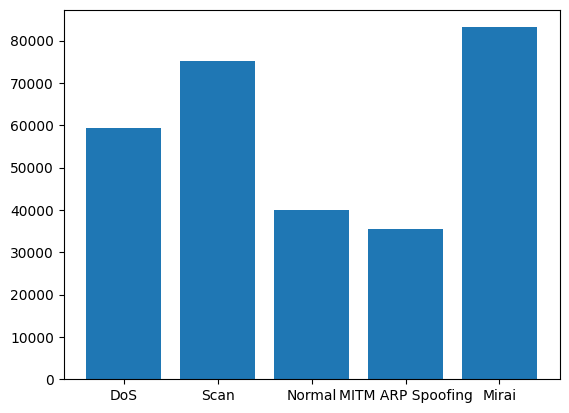

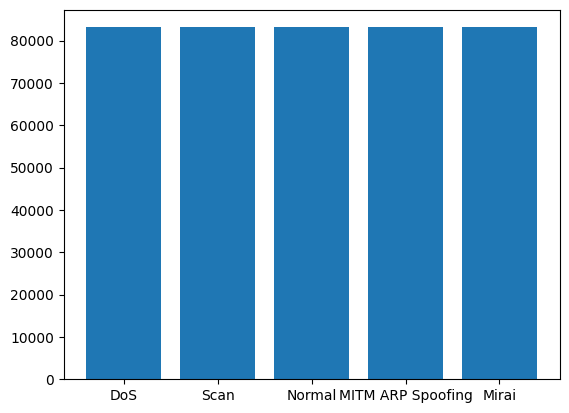

In [ ]:
#Data oversampling

from imblearn.over_sampling import SMOTE


data_count = Counter(y)
print(data_count)


data_scalled_shape=data_scalled.shape
print(data_scalled_shape)
#strategy1 ={'Normal': 454619, 'Ddos': 380699, 'PortScan': 158930, 'Brute_Force': 13835, 'Web_Attack': 2180, 'Bot': 1966, 'Infiltration': 36}
strategy1 = {'Mirai': 83135, 'Scan': 83135, 'DoS': 83135, 'Normal': 83135, 'MITM ARP Spoofing': 83135}

sm = SMOTE(sampling_strategy=strategy1)

X_os, y_os = sm.fit_resample(data_scalled, y)


print("X_os shape: ", X_os.shape)

data_count_os = Counter(y_os)
print(data_count_os)

pyplot.bar(data_count.keys(), data_count.values())
pyplot.show()

pyplot.bar(data_count_os.keys(), data_count_os.values())
pyplot.show()

In [ ]:
X_os.shape

(415675, 52)

In [ ]:
data_osamp = pd.DataFrame(X_os)
data_osamp["Label"] = y_os
data_osamp

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Std,Label
0,-1.169927,-0.856510,-0.399268,0.811699,-0.021135,0.215317,-0.329708,-0.421102,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.435393,0.0,-0.079956,-0.024008,1.282846,DoS
1,0.935977,-0.405957,-0.399268,-0.212849,-0.352259,0.832888,-0.329708,0.819717,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,-0.559451,0.0,-0.079956,-0.024008,-0.060342,Scan
2,0.466869,-0.862417,-0.399268,-0.218597,-0.352259,0.215317,-0.329708,0.859515,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,-0.693389,0.0,-0.079956,-0.024008,-0.060762,Scan
3,-0.929373,-0.856510,-0.399268,1.106834,-0.352259,0.215317,-0.329708,-0.421102,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,0.435393,0.0,-0.079956,-0.024008,-0.060762,DoS
4,-0.884921,1.463308,-0.399268,11.737235,1.303362,3.303171,4.055712,0.063993,2.012294,1.631042,...,0.0,0.0,0.0,0.0,1.848071,0.0,4.382902,10.760384,9.757990,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415670,-0.884921,1.919555,-0.399268,-0.211660,0.309989,-0.402254,1.813589,0.192674,2.012294,2.325576,...,0.0,0.0,0.0,0.0,-0.559451,0.0,-0.079956,-0.024008,-0.060342,Scan
415671,0.936477,-0.405957,-0.399268,-0.211858,-0.352259,0.215317,-0.329708,0.806451,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,-0.559451,0.0,-0.079956,-0.024008,-0.060762,Scan
415672,-0.860757,1.070445,-0.399268,-0.217571,-0.021135,-0.402254,-0.077597,-0.290835,0.083808,0.201012,...,0.0,0.0,0.0,0.0,-0.701829,0.0,-0.079956,-0.024008,-0.060762,Scan
415673,0.935019,-0.405957,-0.399268,-0.212254,-0.352259,0.832888,-0.329708,1.420228,-0.509444,-0.452559,...,0.0,0.0,0.0,0.0,-0.559451,0.0,-0.079956,-0.024008,-0.060762,Scan


In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
#data_fs1=data_oversamp1.copy()
data_osamp_shape=data_osamp.shape
print(data_osamp_shape)

X1 = data_osamp.iloc[:, 0:(data_osamp_shape[1]-1)].values
y1 = data_osamp.iloc[:, (data_osamp_shape[1]-1)].values


# Splitting the dataset into the Training set and Test set
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X1, y1, random_state=50, shuffle=True, test_size = 0.3)


print(Xos_train.shape)
print(yos_train.shape)
print(Xos_test.shape)
print(yos_test.shape)

(415675, 53)
(290972, 52)
(290972,)
(124703, 52)
(124703,)


In [ ]:
# Classsfiersssssss

Starting Grid Search...

Params: n_estimators=10, max_depth=None, min_samples_split=2, bootstrap=True -> Accuracy: 0.9817
Params: n_estimators=10, max_depth=None, min_samples_split=2, bootstrap=False -> Accuracy: 0.9841
Params: n_estimators=10, max_depth=None, min_samples_split=4, bootstrap=True -> Accuracy: 0.9828
Params: n_estimators=10, max_depth=None, min_samples_split=4, bootstrap=False -> Accuracy: 0.9839
Params: n_estimators=10, max_depth=3, min_samples_split=2, bootstrap=True -> Accuracy: 0.8423
Params: n_estimators=10, max_depth=3, min_samples_split=2, bootstrap=False -> Accuracy: 0.8526
Params: n_estimators=10, max_depth=3, min_samples_split=4, bootstrap=True -> Accuracy: 0.8423
Params: n_estimators=10, max_depth=3, min_samples_split=4, bootstrap=False -> Accuracy: 0.8526
Params: n_estimators=10, max_depth=5, min_samples_split=2, bootstrap=True -> Accuracy: 0.8898
Params: n_estimators=10, max_depth=5, min_samples_split=2, bootstrap=False -> Accuracy: 0.8848
Params: n_estimato

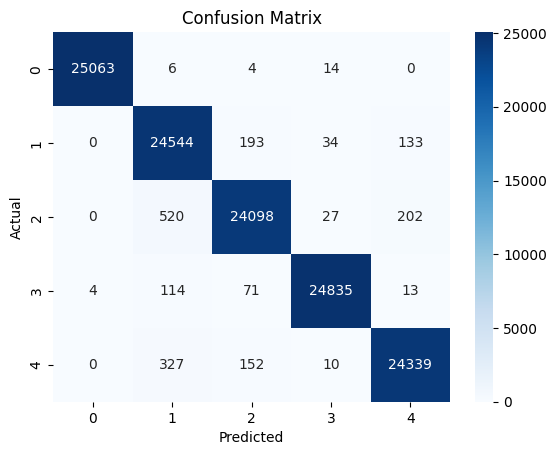

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 125, 150],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4],
    'bootstrap': [True, False]
}

# Track best model
best_params = None
best_score = 0
best_model = None

print("Starting Grid Search...\n")

# Manual grid search
for n in param_grid['n_estimators']:
    for d in param_grid['max_depth']:
        for s in param_grid['min_samples_split']:
            for b in param_grid['bootstrap']:
                # Initialize model
                model = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=d,
                    min_samples_split=s,
                    bootstrap=b,
                    random_state=42
                )

                # Train model
                model.fit(Xos_train, yos_train)

                # Predict on test set
                y_pred = model.predict(Xos_test)
                acc = accuracy_score(yos_test, y_pred)

                # Print current configuration and accuracy
                print(f"Params: n_estimators={n}, max_depth={d}, min_samples_split={s}, bootstrap={b} -> Accuracy: {acc:.4f}")

                # Update best model if applicable
                if acc > best_score:
                    best_score = acc
                    best_params = {
                        'n_estimators': n,
                        'max_depth': d,
                        'min_samples_split': s,
                        'bootstrap': b
                    }
                    best_model = model

# Final Results
print("\n Best Parameters:", best_params)
print(f" Best Accuracy on Test Set: {best_score:.4f}")

# Evaluation of best model
final_pred = best_model.predict(Xos_test)
print("\nClassification Report:")
print(classification_report(yos_test, final_pred))

# Confusion matrix
conf_matrix = confusion_matrix(yos_test, final_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Running Cross-Validation with Multiclass ROC...



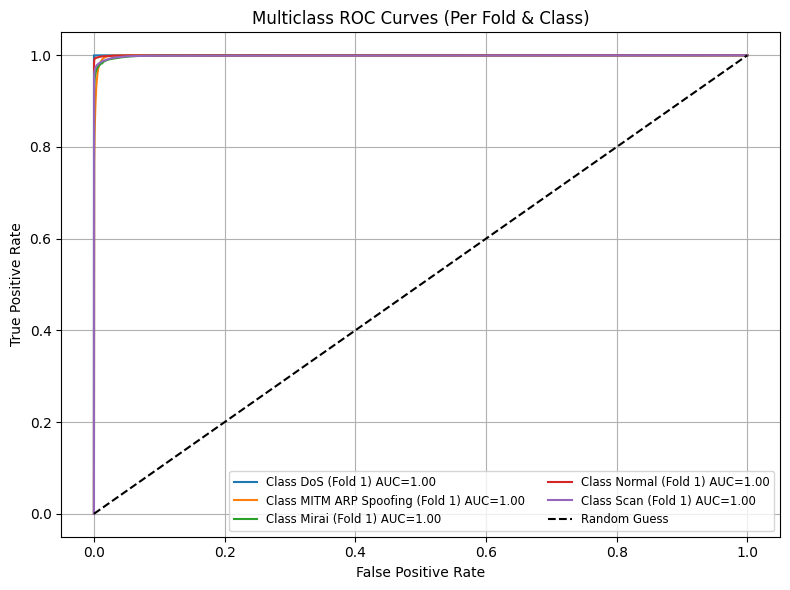

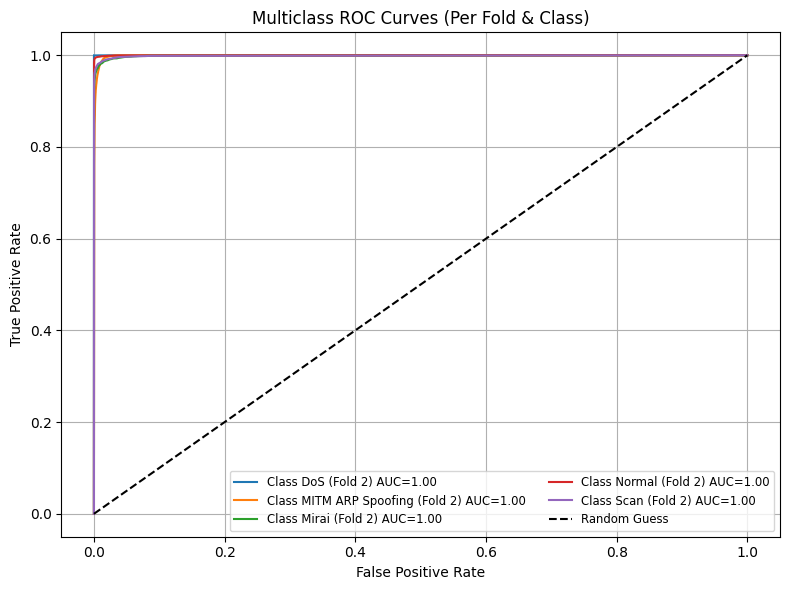

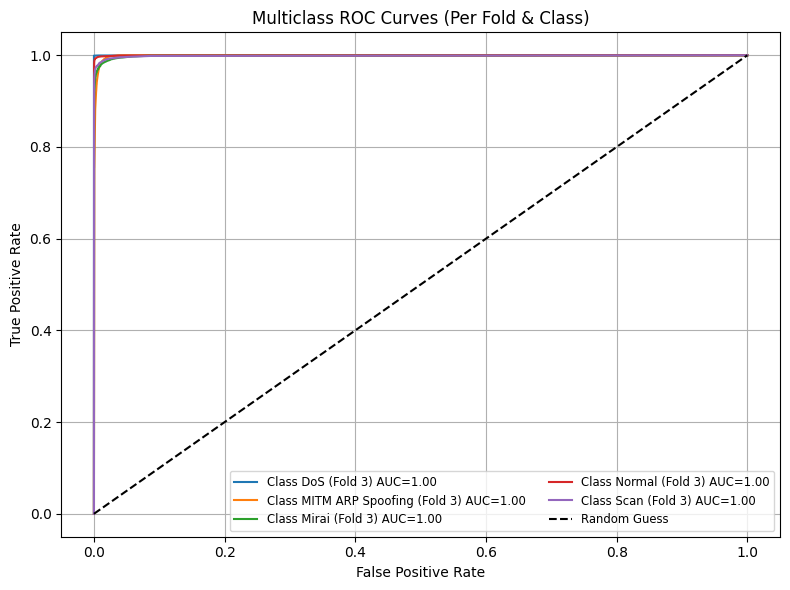

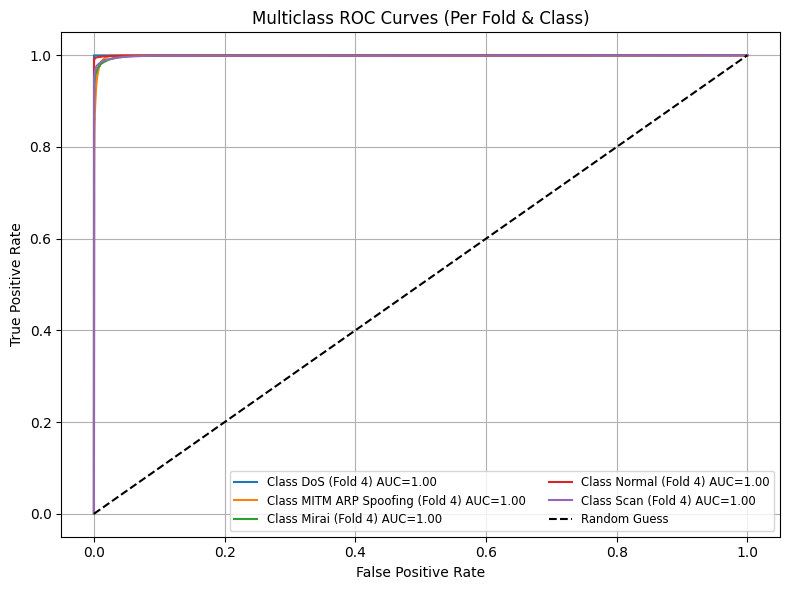

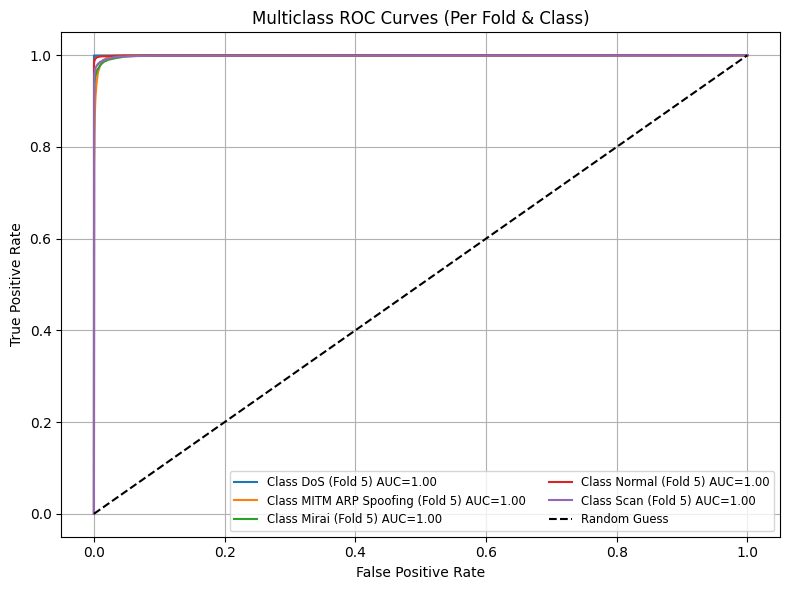

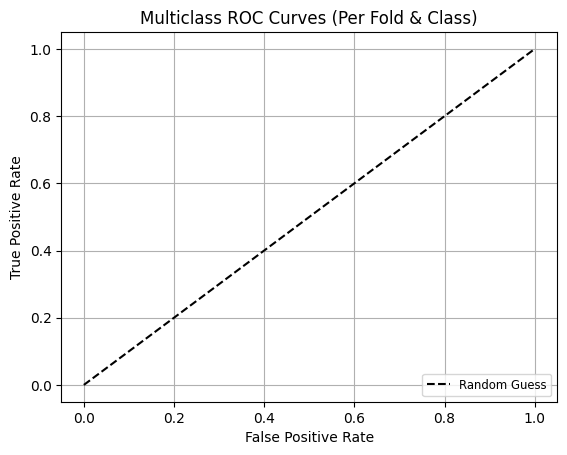

Best Fold: 1 with Avg AUC: 0.9993

🔍 Test Set Evaluation Using Best Fold Model:
                   precision    recall  f1-score   support

              DoS       1.00      1.00      1.00     25087
MITM ARP Spoofing       0.96      0.98      0.97     24904
            Mirai       0.98      0.97      0.97     24847
           Normal       1.00      0.99      0.99     25037
             Scan       0.98      0.98      0.98     24828

         accuracy                           0.98    124703
        macro avg       0.98      0.98      0.98    124703
     weighted avg       0.98      0.98      0.98    124703



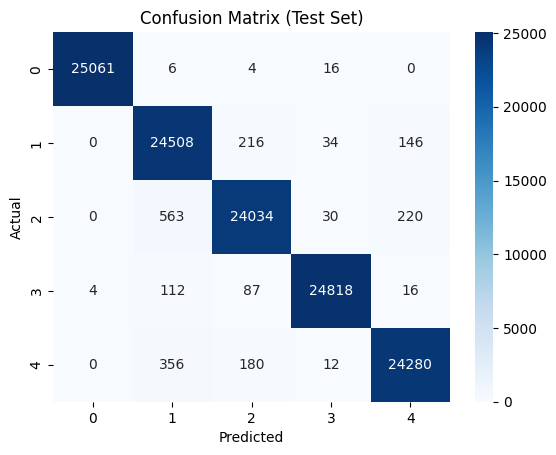

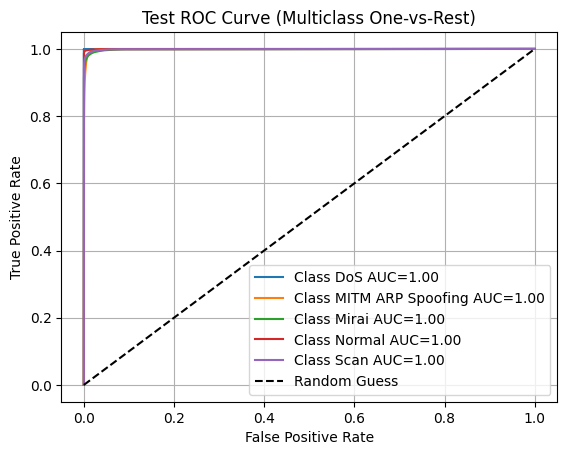


Class DoS - AUC: 0.9998
FPR: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.00770960e-05 2.00770960e-05 2.00770960e-05 3.01156441e-05
 3.01156441e-05 5.01927401e-05 5.01927401e-05 7.02698362e-05
 7.02698362e-05 1.10424028e-04 1.30501124e-04 1.40539672e-04
 1.40539672e-04 1.50578220e-04 1.70655316e-04 1.80693864e-04
 1.80693864e-04 2.00770960e-04 2.00770960e-04 2.20848057e-04
 2.61002249e-04 2.61002249e-04 2.71040797e-04 3.11194989e-04
 3.51349181e-04 3.61387729e-04 3.81464825e-04 3.91503373e-04
 4.11580469e-04 4.21619017e-04 4.41696113e-04 4.51734661e-04
 4.61773209e-04 4.61773209e-04 4.81850305e-04 4.81850305e-04
 4.91888853e-04 5.11965949e-04 5.22004497e-04 5.52120141e-04
 5.72197237e-04 6.12351429e-04 6.22389978e-04 6.3242852

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Assume: yos_train and yos_test are labels, and you know the classes
classes = np.unique(yos_train)
n_classes = len(classes)

# Binarize labels for ROC computation
y_train_bin = label_binarize(yos_train, classes=classes)
y_test_bin = label_binarize(yos_test, classes=classes)

# Best hyperparameters
best_params = {
    'n_estimators': 50,
    'max_depth': None,
    'min_samples_split': 4,
    'bootstrap': False
}

# 5-fold Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

print("Running Cross-Validation with Multiclass ROC...\n")

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(Xos_train, yos_train), 1):
    X_train, X_val = Xos_train[train_idx], Xos_train[val_idx]
    y_train, y_val = yos_train[train_idx], yos_train[val_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    y_val_proba = model.predict_proba(X_val)
    y_val_bin = label_binarize(y_val, classes=classes)

    # Compute AUC per class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    avg_auc = np.mean(list(roc_auc.values()))
    fold_results.append({
        'fold': fold,
        'model': model,
        'train_idx': train_idx,
        'val_idx': val_idx,
        'roc_auc': roc_auc,
        'avg_auc': avg_auc,
        'fpr': fpr,
        'tpr': tpr
    })

    # Wider figure to prevent label overlap
    plt.figure(figsize=(8, 6))

    # Plot ROC curve per class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (Fold {fold}) AUC={roc_auc[i]:.2f}")

    # # Wider figure to prevent label overlap
    # plt.figure(figsize=(16, 6))

    # # Plot ROC curve per class
    # for i in range(n_classes):
    #   plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (Fold {fold}) AUC={roc_auc[i]:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title("Multiclass ROC Curves (Per Fold & Class)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right', fontsize='small', ncol=2)  # Two columns for better spacing
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Finalize ROC plot for all folds and classes
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("Multiclass ROC Curves (Per Fold & Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()

# Select best fold
best_fold_result = max(fold_results, key=lambda x: x['avg_auc'])
print(f"Best Fold: {best_fold_result['fold']} with Avg AUC: {best_fold_result['avg_auc']:.4f}")

# Retrain model using best fold's training set
X_best_train = Xos_train[best_fold_result['train_idx']]
y_best_train = yos_train[best_fold_result['train_idx']]
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_best_train, y_best_train)

# Predict on test set
y_test_pred = best_model.predict(Xos_test)
y_test_proba = best_model.predict_proba(Xos_test)

print("\n🔍 Test Set Evaluation Using Best Fold Model:")
print(classification_report(yos_test, y_test_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(yos_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve per class (test set)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    plt.plot(fpr_test[i], tpr_test[i], label=f"Class {classes[i]} AUC={roc_auc_test[i]:.2f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("Test ROC Curve (Multiclass One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print FPR and TPR
for i in range(n_classes):
    print(f"\nClass {classes[i]} - AUC: {roc_auc_test[i]:.4f}")
    print(f"FPR: {fpr_test[i]}")
    print(f"TPR: {tpr_test[i]}")


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import LabelEncoder

# STEP 1: Encode labels if they are not integers
encoder = LabelEncoder()
yos_train = encoder.fit_transform(yos_train)
yos_test = encoder.transform(yos_test)
n_classes = len(np.unique(yos_train))

# STEP 2: Define model builder function
def build_model(hidden_units, dropout_rate, optimizer_name):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=Xos_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units // 2, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    optimizer = Adam() if optimizer_name == 'adam' else RMSprop()
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# STEP 3: Manual Grid Search (without CV)
param_grid = {
    'hidden_units': [32, 64, 128],
    'dropout_rate': [0.0, 0.2],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32],
    'epochs': [20]
}

results = []
for hu in param_grid['hidden_units']:
    for dr in param_grid['dropout_rate']:
        for opt in param_grid['optimizer']:
            for bs in param_grid['batch_size']:
                for ep in param_grid['epochs']:
                    model = build_model(hu, dr, opt)
                    history = model.fit(Xos_train, yos_train, epochs=ep, batch_size=bs, verbose=0)
                    _, acc = model.evaluate(Xos_test, yos_test, verbose=0)
                    results.append(((hu, dr, opt, bs, ep), acc))
                    print(f"Accuracy={acc:.4f} | HU={hu}, DR={dr}, OPT={opt}")

# STEP 4: Select best parameters
best_params, best_test_acc = max(results, key=lambda x: x[1])
best_hu, best_dr, best_opt, best_bs, best_ep = best_params

print("\nBest Hyperparameters Found:")
print(f"Hidden Units: {best_hu}, Dropout: {best_dr}, Optimizer: {best_opt}, Batch Size: {best_bs}, Epochs: {best_ep}")
print(f"Test Accuracy with Best Params: {best_test_acc:.4f}")





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy=0.9509 | HU=32, DR=0.0, OPT=adam
Accuracy=0.9276 | HU=32, DR=0.0, OPT=rmsprop
Accuracy=0.9104 | HU=32, DR=0.2, OPT=adam
Accuracy=0.9278 | HU=32, DR=0.2, OPT=rmsprop
Accuracy=0.9598 | HU=64, DR=0.0, OPT=adam
Accuracy=0.9514 | HU=64, DR=0.0, OPT=rmsprop
Accuracy=0.8862 | HU=64, DR=0.2, OPT=adam
Accuracy=0.8915 | HU=64, DR=0.2, OPT=rmsprop
Accuracy=0.9613 | HU=128, DR=0.0, OPT=adam
Accuracy=0.9280 | HU=128, DR=0.0, OPT=rmsprop
Accuracy=0.8979 | HU=128, DR=0.2, OPT=adam
Accuracy=0.9475 | HU=128, DR=0.2, OPT=rmsprop

Best Hyperparameters Found:
Hidden Units: 128, Dropout: 0.0, Optimizer: adam, Batch Size: 32, Epochs: 20
Test Accuracy with Best Params: 0.9613



Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 1 Accuracy: 0.9621

Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 2 Accuracy: 0.9618

Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 3 Accuracy: 0.9037

Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 4 Accuracy: 0.9596

Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1819/1819 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Fold 5 Accuracy: 0.9597

Overall Accuracy (5-Fold CV): 0.9494

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58048
           1       0.88      0.93      0.91     58231
           2       0.97      0.88      0.92     58288
           3       0.99      0.98      0.99     58098
           4       0.91      0.96      0.93     58307

    accuracy                           0.95    290972
   macro avg       0.95      0.95      0.95    290972
weighted avg       0.95      0.95      0.95    290972



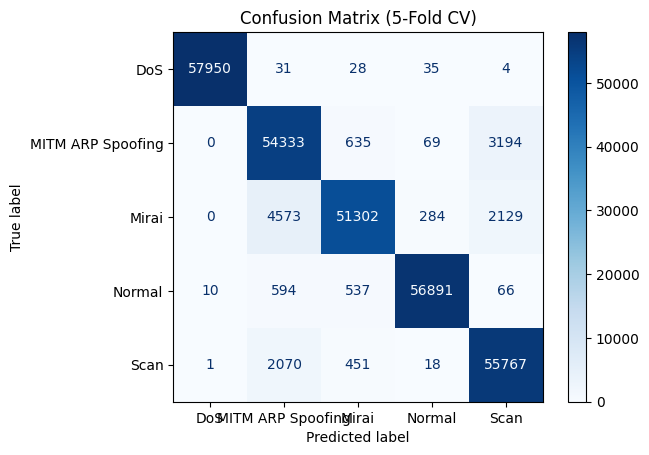

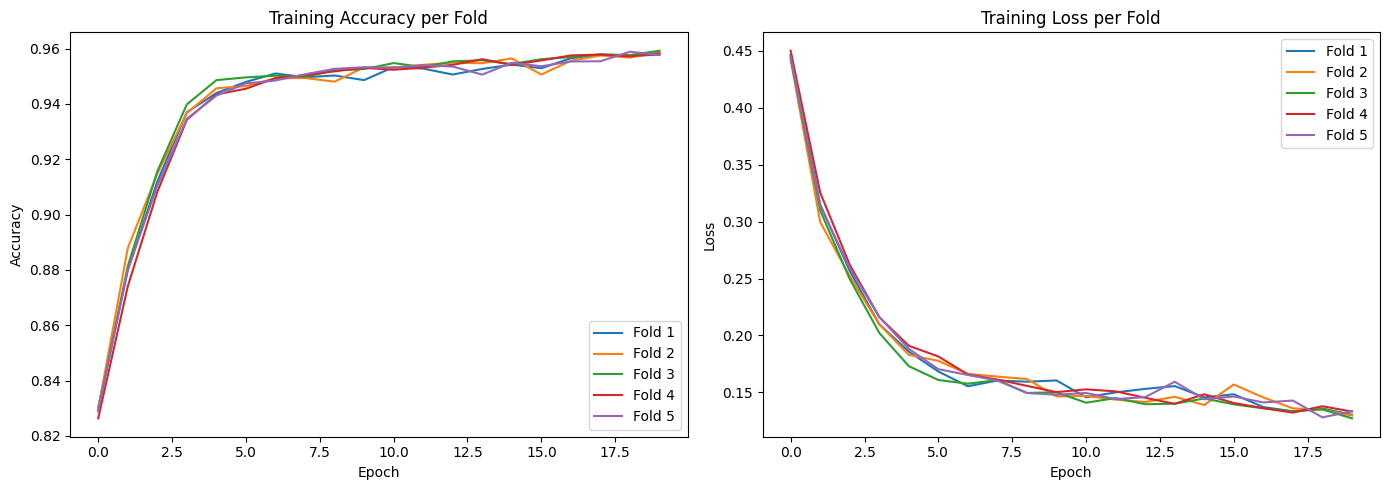

In [ ]:
# STEP 5: 5-Fold CV on best model
# Neural Network
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
histories = []
all_y_true = []
all_y_pred = []

for fold, (train_idx, val_idx) in enumerate(kf.split(Xos_train, yos_train)):
    print(f"\nFold {fold+1}")
    X_tr, X_val = Xos_train[train_idx], Xos_train[val_idx]
    y_tr, y_val = yos_train[train_idx], yos_train[val_idx]

    model = build_model(best_hu, best_dr, best_opt)
    history = model.fit(X_tr, y_tr, epochs=best_ep, batch_size=best_bs, verbose=0)
    histories.append(history)

    y_pred_fold = np.argmax(model.predict(X_val), axis=1)
    acc = accuracy_score(y_val, y_pred_fold)
    fold_accuracies.append(acc)

    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred_fold)
    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

# STEP 6: Evaluation
final_acc = accuracy_score(all_y_true, all_y_pred)
print("\nOverall Accuracy (5-Fold CV):", round(final_acc, 4))
print("\nClassification Report:\n", classification_report(all_y_true, all_y_pred))

# Confusion Matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (5-Fold CV)")
plt.show()

# Plot Training Accuracy and Loss
plt.figure(figsize=(14, 5))
for i, history in enumerate(histories):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label=f'Fold {i+1}')
    plt.title("Training Accuracy per Fold")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label=f'Fold {i+1}')
    plt.title("Training Loss per Fold")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()


Training KNN...

Results for KNN
Accuracy     : 0.9782
Precision    : 0.9785
Recall       : 0.9782
F1-Score     : 0.9783
Confusion Matrix:
[[25031     7    16    29     4]
 [    0 24524   192    61   127]
 [    6   793 23577   109   362]
 [    4   202   119 24692    20]
 [    3   438   177    45 24165]]


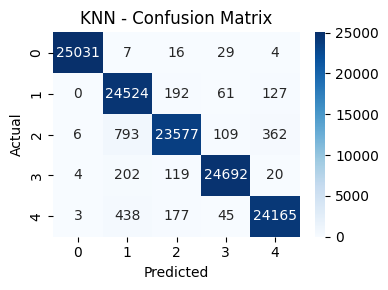


Training Random Forest...

Results for Random Forest
Accuracy     : 0.9847
Precision    : 0.9848
Recall       : 0.9847
F1-Score     : 0.9847
Confusion Matrix:
[[25063     6     3    14     1]
 [    0 24575   175    33   121]
 [    0   582 24033    20   212]
 [    4   123    85 24810    15]
 [    0   365   143    11 24309]]


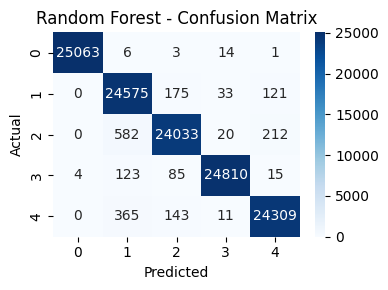


Training NODE (XGBoost)...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Results for NODE (XGBoost)
Accuracy     : 0.9865
Precision    : 0.9867
Recall       : 0.9865
F1-Score     : 0.9865
Confusion Matrix:
[[25063     8     4    12     0]
 [    0 24711   113    20    60]
 [    0   540 24131    20   156]
 [    3   107    69 24853     5]
 [    0   468    92     9 24259]]


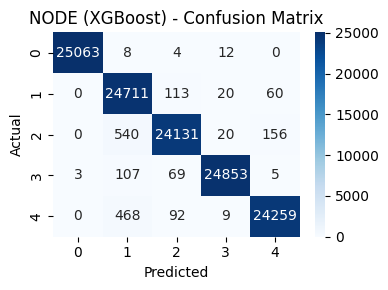


Training Voting Classifier (Soft)...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Results for Voting Classifier (Soft)
Accuracy     : 0.9870
Precision    : 0.9873
Recall       : 0.9870
F1-Score     : 0.9871
Confusion Matrix:
[[25059     6     4    17     1]
 [    0 24764    68    14    58]
 [    1   528 24093    17   208]
 [    2   131    54 24843     7]
 [    0   380   108    11 24329]]


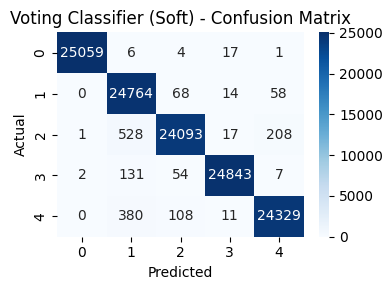


Summary of All Models:

                      Model  Accuracy  Precision    Recall  F1-Score  ROC-AUC
0                       KNN  0.978236   0.978546  0.978236  0.978258      NaN
1             Random Forest  0.984660   0.984833  0.984660  0.984687      NaN
2            NODE (XGBoost)  0.986480   0.986736  0.986480  0.986516      NaN
3  Voting Classifier (Soft)  0.987049   0.987280  0.987049  0.987075      NaN
Results saved to 'voting_results.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from xgboost import XGBClassifier  # NODE replacement

# Define classifiers
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('knn', clf1),
        ('rf', clf2),
        ('node', clf3)
    ],
    voting='soft'
)

# Models list
models = [
    ('KNN', clf1),
    ('Random Forest', clf2),
    ('NODE (XGBoost)', clf3),
    ('Voting Classifier (Soft)', voting_clf)
]

# Results containers
model_results = []
roc_data = []
binary_class = len(np.unique(yos_test)) == 2

# Train and evaluate models
for name, model in models:
    print(f"\nTraining {name}...")
    model.fit(Xos_train, yos_train)

    y_pred = model.predict(Xos_test)
    y_proba = model.predict_proba(Xos_test)[:, 1] if binary_class and hasattr(model, 'predict_proba') else None

    acc = accuracy_score(yos_test, y_pred)
    prec = precision_score(yos_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(yos_test, y_pred, average='weighted')
    f1 = f1_score(yos_test, y_pred, average='weighted')
    auc = roc_auc_score(yos_test, y_proba) if y_proba is not None else np.nan

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc
    })

    print(f"\nResults for {name}")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1-Score     : {f1:.4f}")
    if y_proba is not None:
        print(f"ROC-AUC      : {auc:.4f}")

    # Confusion Matrix
    conf_mat = confusion_matrix(yos_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(yos_test, y_proba)
        roc_data.append((name, fpr, tpr, auc))

# Summary table
results_df = pd.DataFrame(model_results)
print("\nSummary of All Models:\n")
print(results_df)
results_df.to_csv("voting_results.csv", index=False)
print("Results saved to 'voting_results.csv'")

# Plot ROC Curves
if binary_class and roc_data:
    plt.figure(figsize=(8, 6))
    for name, fpr, tpr, auc in roc_data:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves of All Models")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [ ]:
#import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
RF_fs = RandomForestClassifier(n_estimators = 100)
RF_fs.fit(Xos_train, yos_train)

RandomForestClassifier()

In [ ]:
# sel = SelectFromModel(model_rf)
# sel.fit(Xos_train, yos_train)

In [ ]:
total_col1 = data_osamp.columns.shape
total_col = total_col1[0]
data_osamp.columns[0:total_col]

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Std', 'Flow KBytes/s', 'Flow Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
       'Fwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Std', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'ACK_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio',
       'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Seg_Size_Min',
       'Active_Mean', 'Active_Std', 'Idle_Std', 'Label'],
      dtype='object')

In [ ]:
ftr_imp1 = pd.DataFrame(RF_fs.feature_importances_, index=data_osamp.columns[0:(total_col-1)]).sort_values(by=0, ascending=False)
ftr_imp = ftr_imp1.values.flatten()
ftr_imp

array([2.07428599e-01, 1.07116182e-01, 8.38913595e-02, 8.35344863e-02,
       7.79823334e-02, 5.79037787e-02, 5.71909922e-02, 3.47527915e-02,
       3.23591169e-02, 2.68247654e-02, 2.58933933e-02, 2.49294798e-02,
       2.14821062e-02, 1.96594986e-02, 1.70225045e-02, 1.54000364e-02,
       1.40308842e-02, 1.36818469e-02, 1.12867879e-02, 1.10263954e-02,
       9.60863031e-03, 9.26533571e-03, 8.14601193e-03, 5.30307215e-03,
       5.08222729e-03, 4.10263690e-03, 2.82425849e-03, 2.61811041e-03,
       2.49896983e-03, 2.13139722e-03, 1.95634306e-03, 1.21361600e-03,
       7.07990583e-04, 5.74302644e-04, 2.53784827e-04, 1.66523445e-04,
       5.36970856e-05, 4.07415702e-05, 2.19005731e-05, 2.09842413e-05,
       1.05167378e-05, 1.61110834e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

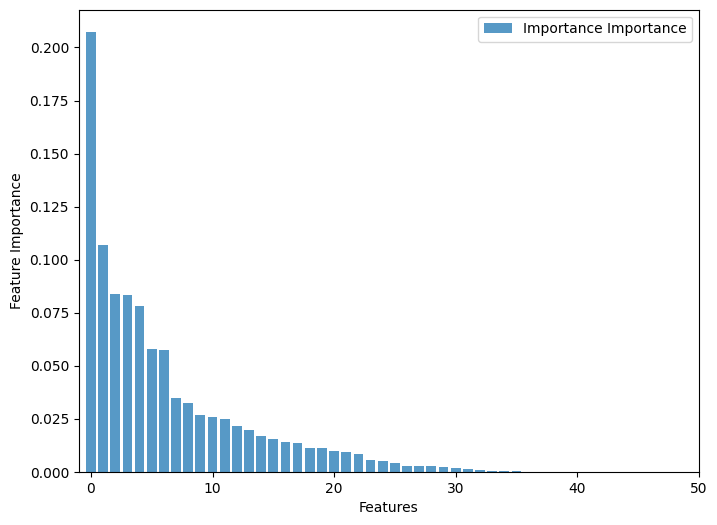

In [ ]:
n_components = len(ftr_imp)
plt.figure(figsize=(8, 6))
plt.bar(range(n_components), ftr_imp, alpha=.75, align='center', label='Importance Importance')
plt.legend()
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xlim([-1, 50])
plt.show()

In [ ]:
# sel.get_support()

In [ ]:
# selected_feat= data_osamp.columns[0:(total_col-1)][(sel.get_support())]
# len(selected_feat)

In [ ]:
# print(selected_feat)

In [ ]:
# pd.series(sel.estimator_,feature_importances_.ravel()).hist()

In [1]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
ftr_imp1 = pd.DataFrame(model_rf.feature_importances_, index=data_fs.columns[0:(total_col-1)]).sort_values(by=0, ascending=False)
ftr_imp = ftr_imp1.values.flatten()
ftr_imp

NameError: name 'RandomForestClassifier' is not defined

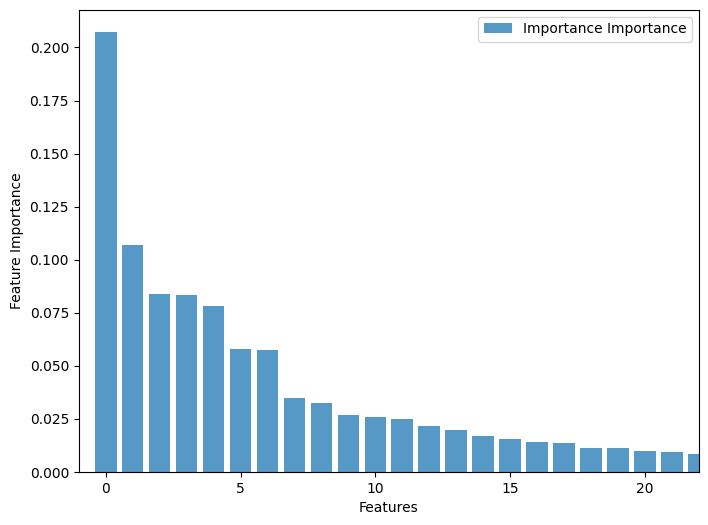

In [ ]:
n_components = len(ftr_imp)
plt.figure(figsize=(8, 6))
plt.bar(range(n_components), ftr_imp, alpha=.75, align='center', label='Importance Importance')
plt.legend()
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xlim([-1, 22])
plt.show()

In [ ]:
data_fs=data_osamp[['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Flow_IAT_Mean', 'Bwd_IAT_Mean', 'Bwd_Pkts/s',
       'SYN_Flag_Cnt', 'ACK_Flag_Cnt', 'Init_Bwd_Win_Byts','Label']]
data_fs

,Src_Port,Dst_Port,Protocol,Flow_Duration,TotLen_Fwd_Pkts,Fwd_Pkt_Len_Max,Flow_IAT_Mean,Bwd_IAT_Mean,Bwd_Pkts/s,SYN_Flag_Cnt,ACK_Flag_Cnt,Init_Bwd_Win_Byts,Label
0,-1.169927,-0.856510,-0.399268,0.811699,-0.329708,-0.509444,0.639745,1.365850,-0.321522,2.014441,-1.273492,0.435393,DoS
1,0.935977,-0.405957,-0.399268,-0.212849,-0.329708,-0.509444,-0.319124,-0.267226,0.074916,-0.496416,0.785243,-0.559451,Scan
2,0.466869,-0.862417,-0.399268,-0.218597,-0.329708,-0.509444,-0.303727,-0.254291,0.010054,-0.496416,0.785243,-0.693389,Scan
3,-0.929373,-0.856510,-0.399268,1.106834,-0.329708,-0.509444,2.177199,1.829950,-0.323087,2.014441,-1.273492,0.435393,DoS
4,-0.884921,1.463308,-0.399268,11.737235,4.055712,2.012294,1.692933,2.850044,-0.326470,-0.496416,0.785243,1.848071,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415670,-0.884921,1.919555,-0.399268,-0.211660,1.813589,2.012294,-0.318011,-0.289199,-0.199630,-0.496416,0.785243,-0.559451,Scan
415671,0.936477,-0.405957,-0.399268,-0.211858,-0.329708,-0.509444,-0.291113,-0.243693,-0.068826,-0.496416,0.785243,-0.559451,Scan
415672,-0.860757,1.070445,-0.399268,-0.217571,-0.077597,0.083808,-0.301807,-0.289199,-0.166775,-0.496416,0.785243,-0.701829,Scan
415673,0.935019,-0.405957,-0.399268,-0.212254,-0.329708,-0.509444,-0.318567,-0.266758,0.066508,-0.496416,0.785243,-0.559451,Scan


In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
#data_fs1=data_oversamp1.copy()
data_fs_shape=data_fs.shape
print(data_fs_shape)

X2 = data_fs.iloc[:, 0:(data_fs_shape[1]-1)].values
y2 = data_fs.iloc[:, (data_fs_shape[1]-1)].values


# Splitting the dataset into the Training set and Test set
data_train, data_test, yd_train, yd_test = train_test_split(X2, y2, random_state=50, shuffle=True, test_size = 0.3)


print(data_train.shape)
print(yd_train.shape)
print(data_test.shape)
print(yd_test.shape)

(293241, 55)
(205268, 54)
(205268,)
(87973, 54)
(87973,)


In [ ]:
def model_results_multi(confusion_matrix1):

    precision = []
    recall = []
    f1score = []
    fprate = []

    FP = confusion_matrix1.sum(axis=0) - np.diag(confusion_matrix1)
    FN = confusion_matrix1.sum(axis=1) - np.diag(confusion_matrix1)
    TP = np.diag(confusion_matrix1)
    TN = confusion_matrix1.sum() - (FP + FN + TP)

    # Precision
    PRC = TP/(TP+FP)
    print("\n Precision ")
    print(PRC)
    precision_1 = PRC.mean()
    precision.append(precision_1)
    print("Precision: = ",precision)


    # Recall
    RC = TP/(TP+FN)
    print("\n Recall ")
    print(RC)
    recall_1 = RC.mean()
    recall.append(recall_1)
    print("Recall:", recall)

    # F1_Score
    F1_SCORE = (2*PRC*RC)/(PRC+RC)
    print("\n F1_SCORE")
    print(F1_SCORE)
    f1score_1 = F1_SCORE.mean()
    f1score.append(f1score_1)
    print("F1_SCORE: = ",f1score)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("\n False Positive Rate ")
    print(FPR)
    FPR_1 = FPR.mean()
    fprate.append(FPR_1)
    print("FPR:= ",fprate)
    print("\n")

    # Overall Accuracy
    accuracy = (sum(TP))/confusion_matrix1.sum()
    print("\n Overall Accuracy", accuracy)

In [ ]:
#Random forest Model (20 PCA)

#Create a Gaussian Classifier
model_rf = RandomForestClassifier()

from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#print(dclf.get_params())


#Train the model using the training sets
start_time = time.time()
model_rf.fit(data_train,yd_train)
training_elapsed_time = time.time() - start_time
print("Model fitting time: ", training_elapsed_time)


model_rf_cv_score = cross_validate(model_rf, data_train, yd_train, cv=5)


start_time1 = time.time()
RF_pred=model_rf.predict(data_test)
test_elapsed_time1 = time.time() - start_time1
print("Total Testing time: ", test_elapsed_time1)


print("=== All Scores ===")
print(model_rf_cv_score)
print('\n')
print("=== Mean Score ===")
#print("Mean AUC Score - Random Forest: ", clf_cv_score.mean())
for key, value in model_rf_cv_score.items():
  print(key, " mean = ", value.mean())

#target_names = ['True', 'False']
print(classification_report(yd_test, RF_pred))


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yd_test, RF_pred))

# Creating the Confusion Matrix
confusion_matrix1 = confusion_matrix(yd_test, RF_pred)
print(confusion_matrix1)


model_results_multi(confusion_matrix1)

FP = confusion_matrix1.sum(axis=0) - np.diag(confusion_matrix1)
FN = confusion_matrix1.sum(axis=1) - np.diag(confusion_matrix1)
TP = np.diag(confusion_matrix1)
TN = confusion_matrix1.sum() - (FP + FN + TP)


# Fall out or false positive rate
FPR = FP/(FP+TN)
print("\n False Positive Rate ")
print(FPR)
print("Average FPR = ",FPR.mean())

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy",ACC)


ValueError: could not convert string to float: 'Normal'

In [ ]:
#data_final.to_csv('/content/drive/MyDrive/IoTID20/IoTID20_PP.csv',float_format='%.6f',index=False)

In [ ]:
######### mount Drive ##################

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #import pandas as pd

# data_path = "/content/drive/MyDrive/Testbed Dataset/CICIDS_data_us(22).csv"
# data_final = pd.read_csv(data_path)

In [ ]:
############# Training..........................

In [ ]:
total_col1 = data_fs.columns.shape
total_col = total_col1[0]
data_fs.columns[0:total_col]

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Flow_IAT_Mean', 'Bwd_IAT_Mean', 'Bwd_Pkts/s',
       'SYN_Flag_Cnt', 'ACK_Flag_Cnt', 'Init_Bwd_Win_Byts', 'Label'],
      dtype='object')

In [ ]:
ftr_imp1 = pd.DataFrame(model_rf.feature_importances_, index=data_fs.columns[0:(total_col-1)]).sort_values(by=0, ascending=False)
ftr_imp = ftr_imp1.values.flatten()
ftr_imp

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

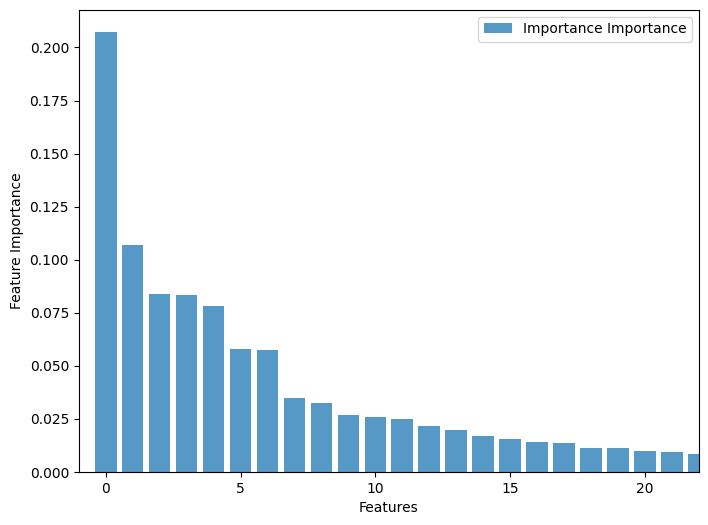

In [ ]:
n_components = len(ftr_imp)
plt.figure(figsize=(8, 6))
plt.bar(range(n_components), ftr_imp, alpha=.75, align='center', label='Importance Importance')
plt.legend()
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xlim([-1, 22])
plt.show()